In [10]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

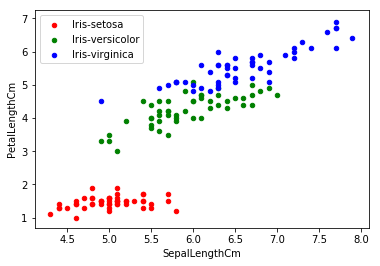

In [25]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot\
    .scatter(0, 1, color = colors[i], ax = ax, label = v)
#plt.legend()

In [47]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df[features].values)
pd.DataFrame(X)

,0,1
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272
...,...,...
145,1.038005,0.819624
146,0.553333,0.705893
147,0.795669,0.819624
148,0.432165,0.933356


In [61]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [62]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

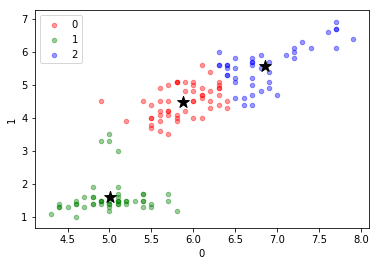

In [63]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue", "orange", "yellow"]
for i in range(k):
    df[y_pred == i][features].plot\
    .scatter(0, 1, ax = ax, color = colors[i], label = i, alpha = 0.4)

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
centroids.plot.scatter(0, 1, ax = ax, s = 150, marker = "*", color = "black")

In [64]:
# Sum of squared distance
kmeans.inertia_ 
# 3: 43.038870666761774 # 22.401089283315386

43.038870666761774

In [65]:
metrics.homogeneity_score(df.Species, y_pred)

0.5826296711195839

In [32]:
.99 ** 1000

4.317124741065786e-05

In [73]:
distances = np.zeros([len(X)])
for i in range(3):
    X_cluster = X[y_pred == i]
    centroid = kmeans.cluster_centers_[i]
    distances[y_pred == i] = np.sqrt(np.sum((X_cluster - centroid) ** 2, axis= 1))

In [74]:
distances[y_pred == 0]

array([0.6378604 , 0.53228383, 0.21037292, 0.52998652, 0.88296901,
       0.1693573 , 0.31919118, 0.29865229, 0.60617332, 0.33152478,
       0.24032281, 0.3955335 , 0.47264526, 0.17779352, 0.39202591,
       0.56627416, 0.29865229, 0.64716652, 0.15323459, 0.60228442,
       0.59996572, 0.63873029, 0.34850109, 0.37791928, 0.57384879,
       0.15323459, 0.519346  , 0.3996193 , 0.53228383, 0.4557077 ,
       0.28107643, 0.29388828, 0.37087429, 0.26813395, 0.26813395,
       0.41037224, 0.3066654 , 0.35680568, 1.1796799 , 0.35712744,
       0.35680568, 0.32674773, 0.40447552, 0.56627416, 0.43245167,
       0.35912937, 0.62154389, 0.68697163, 0.23248341, 0.35680568,
       0.59182591, 0.65020773, 0.34696539])

In [85]:
distances = np.zeros([len(X)])
for i in range(3):
    distances[y_pred == i] = metrics.pairwise_distances(X[y_pred == i]
                , kmeans.cluster_centers_[i].reshape((1, -1))).flatten()
    

In [86]:
distances

array([0.16059913, 0.1704543 , 0.40720911, 0.49456242, 0.11287924,
       0.48143656, 0.50415607, 0.05621711, 0.74234021, 0.13954681,
       0.48118773, 0.24906952, 0.27336957, 0.90061665, 0.98887922,
       0.84329253, 0.50712105, 0.16059913, 0.84343454, 0.12732133,
       0.48143656, 0.12732133, 0.59763948, 0.12825855, 0.30248686,
       0.00681342, 0.00681342, 0.24212473, 0.26116229, 0.37023666,
       0.24906952, 0.48118773, 0.24212473, 0.60961182, 0.13954681,
       0.2265098 , 0.6226358 , 0.13954681, 0.75307222, 0.12732133,
       0.16967762, 0.63560073, 0.75307222, 0.00681342, 0.20629943,
       0.27336957, 0.11444117, 0.50415607, 0.36111128, 0.11287924,
       0.52236774, 0.6378604 , 0.38291965, 0.53228383, 0.70069219,
       0.21037292, 0.52998652, 0.97618497, 0.63284247, 0.88296901,
       1.08152239, 0.1693573 , 0.31919118, 0.29865229, 0.60617332,
       0.69097379, 0.33152478, 0.24032281, 0.3955335 , 0.47264526,
       0.17779352, 0.39202591, 0.56627416, 0.29865229, 0.64716

In [90]:
points = pd.DataFrame(X, columns = features)
points["cluster"] = y_pred
points["distance"] = distances
points["actual"] = df.Species
points.head()

,SepalLengthCm,PetalLengthCm,cluster,distance,actual
0,-0.900681,-1.341272,1,0.160599,Iris-setosa
1,-1.143017,-1.341272,1,0.170454,Iris-setosa
2,-1.385353,-1.398138,1,0.407209,Iris-setosa
3,-1.506521,-1.284407,1,0.494562,Iris-setosa
4,-1.021849,-1.341272,1,0.112879,Iris-setosa


In [91]:
points.cluster.value_counts()

1    54
0    53
2    43
Name: cluster, dtype: int64

In [92]:
points.groupby("cluster").distance.mean()

cluster
0    0.435640
1    0.402361
2    0.558198
Name: distance, dtype: float64

In [95]:
k

3

In [121]:
distanace_threshold = [0.0] * k
for i in range(k):
    points_k = points[points.cluster == i]
    distanace_threshold[i] = np.percentile(points_k.distance, 90)
distanace_threshold

[0.6385563113500915, 0.8433919366435791, 1.071756735594634]

In [122]:
points["anomaly"] = points.apply(lambda row: row.distance 
            > distanace_threshold[row.cluster], axis = 1)

points.head()

,SepalLengthCm,PetalLengthCm,cluster,distance,actual,outlier,anomaly
0,-0.900681,-1.341272,1,0.160599,Iris-setosa,False,False
1,-1.143017,-1.341272,1,0.170454,Iris-setosa,False,False
2,-1.385353,-1.398138,1,0.407209,Iris-setosa,False,False
3,-1.506521,-1.284407,1,0.494562,Iris-setosa,False,False
4,-1.021849,-1.341272,1,0.112879,Iris-setosa,False,False


In [123]:
points.anomaly.value_counts()

False    133
True      17
Name: anomaly, dtype: int64

In [124]:
points[points.anomaly]

,SepalLengthCm,PetalLengthCm,cluster,distance,actual,outlier,anomaly
13,-1.870024,-1.511870,1,0.900617,Iris-setosa,False,True
14,-0.052506,-1.455004,1,0.988879,Iris-setosa,False,True
18,-0.173674,-1.170675,1,0.843435,Iris-setosa,False,True
57,-1.143017,-0.260824,1,0.976185,Iris-versicolor,False,True
59,-0.779513,0.080370,0,0.882969,Iris-versicolor,False,True
...,...,...,...,...,...,...,...
118,2.249683,1.786341,2,1.270726,Iris-virginica,False,True
122,2.249683,1.672610,2,1.206364,Iris-virginica,False,True
131,2.492019,1.502013,2,1.348258,Iris-virginica,False,True
134,0.310998,1.047087,0,0.686972,Iris-virginica,False,True


In [125]:
points_anomalies = scaler.inverse_transform(points[points.anomaly].iloc[:, :2])
points_anomalies

array([[4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.7],
       [4.9, 3.3],
       [5.2, 3.9],
       [5. , 3.5],
       [6.4, 4.3],
       [5.5, 3.7],
       [5. , 3.3],
       [7.6, 6.6],
       [4.9, 4.5],
       [7.7, 6.7],
       [7.7, 6.9],
       [7.7, 6.7],
       [7.9, 6.4],
       [6.1, 5.6],
       [6.2, 5.4]])

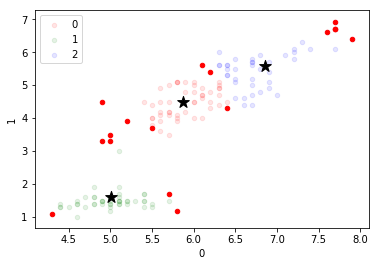

In [126]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue", "orange", "yellow"]
for i in range(k):
    df[y_pred == i][features].plot\
    .scatter(0, 1, ax = ax, color = colors[i], label = i, alpha = 0.1)

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
centroids.plot.scatter(0, 1, ax = ax, s = 150
                , marker = "*", color = "black")

pd.DataFrame(points_anomalies).plot.scatter(0, 1, color = "red", ax = ax)

In [84]:
metrics.pairwise_distances(X[y_pred == i]
                , kmeans.cluster_centers_[i].reshape((1, -1))).shape

(43, 1)